In [15]:
%%time
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import numpy as np
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib
Wall time: 45 ms


In [16]:
path3 = r'C:\Users\DenAS\Downloads\11AA\Source\1.3\NYC' + '//'
FName3 = 'train.csv'
full_patch3 = path3 + FName3
full_patch3

'C:\\Users\\DenAS\\Downloads\\11AA\\Source\\1.3\\NYC//train.csv'

In [17]:
%%time
df = pd.read_csv(full_patch3) #, dtype={'pickup_datetime': float64,'dropoff_datetime': float64})
print(df.shape)

(1458644, 11)
Wall time: 9.59 s


In [18]:
%%time
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df['trip_time'] = df.dropoff_datetime - df.pickup_datetime

Wall time: 2.69 s


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
trip_time             1458644 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(2), timedelta64[ns](1)
memory usage: 133.5+ MB


In [20]:
df = df[:20000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
id                    20000 non-null object
vendor_id             20000 non-null int64
pickup_datetime       20000 non-null datetime64[ns]
dropoff_datetime      20000 non-null datetime64[ns]
passenger_count       20000 non-null int64
pickup_longitude      20000 non-null float64
pickup_latitude       20000 non-null float64
dropoff_longitude     20000 non-null float64
dropoff_latitude      20000 non-null float64
store_and_fwd_flag    20000 non-null object
trip_duration         20000 non-null int64
trip_time             20000 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(3), object(2), timedelta64[ns](1)
memory usage: 1.8+ MB


In [21]:
def t_interval(row):
    return row['pickup_datetime'].hour

In [22]:
%%time
df['Hour'] = df.apply( t_interval, axis = 1 )

Wall time: 3.83 s


In [24]:
df = df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)
#data.drop('weight_pounds',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
id                    20000 non-null object
vendor_id             20000 non-null int64
pickup_datetime       20000 non-null datetime64[ns]
dropoff_datetime      20000 non-null datetime64[ns]
passenger_count       20000 non-null int64
store_and_fwd_flag    20000 non-null object
trip_duration         20000 non-null int64
trip_time             20000 non-null timedelta64[ns]
Hour                  20000 non-null int64
dtypes: datetime64[ns](2), int64(4), object(2), timedelta64[ns](1)
memory usage: 1.4+ MB


In [25]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,store_and_fwd_flag,trip_duration,trip_time,Hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,N,455,00:07:35,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,N,663,00:11:03,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,N,2124,00:35:24,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,N,429,00:07:09,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,N,435,00:07:15,13


In [31]:
df.describe()

,vendor_id,passenger_count,trip_duration,trip_time,Hour
count,20000.0000,20000.000000,20000.000000,20000,20000.000000
mean,1.5302,1.660300,916.695000,0 days 00:15:16.695000,13.616650
std,0.4991,1.309156,2809.643017,0 days 00:46:49.643017,6.422652
min,1.0000,1.000000,2.000000,0 days 00:00:02,0.000000
25%,1.0000,1.000000,395.000000,0 days 00:06:35,9.000000
50%,2.0000,1.000000,657.000000,0 days 00:10:57,14.000000
75%,2.0000,2.000000,1064.000000,0 days 00:17:44,19.000000
max,2.0000,6.000000,86357.000000,0 days 23:59:17,23.000000


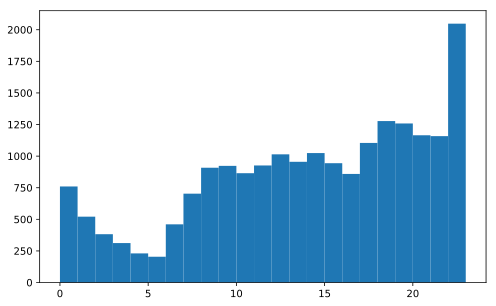

In [48]:
plt.hist( df['Hour'], bins = 23)
plt.show()

In [54]:
df1 = df[['passenger_count','trip_duration'] + ['Hour']]\
    .groupby('Hour').sum()

In [63]:
df1.passenger_count = df1.passenger_count/df1.passenger_count.mean()
df1.trip_duration = df1.trip_duration/df1.trip_duration.mean()
df1.style.bar()

,passenger_count,trip_duration
Hour,,
0,0.901283,0.877707
1,0.621574,0.601306
2,0.464735,0.350513
3,0.391736,0.295692
4,0.286936,0.325059
5,0.234175,0.192368
6,0.492923,0.376331
7,0.800819,0.667633
8,1.08776,1.17604


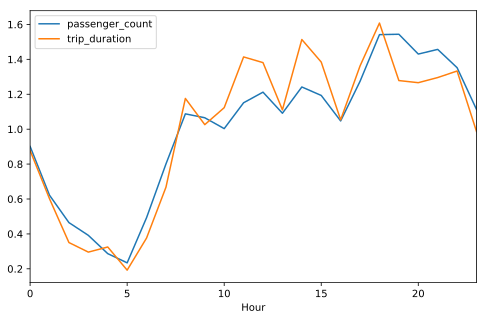

In [64]:
df1.plot();

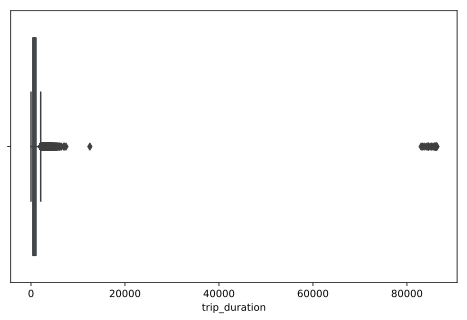

In [66]:
sns.boxplot(data=df, x = 'trip_duration')

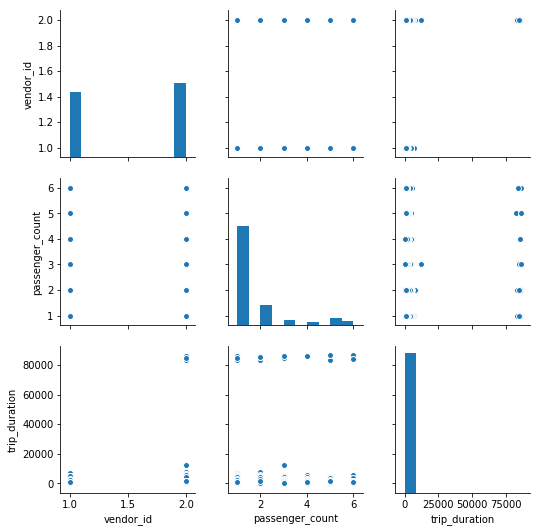

In [67]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df[['vendor_id', 'passenger_count', 'trip_duration']]);
sns_plot.savefig('pairplot.png')

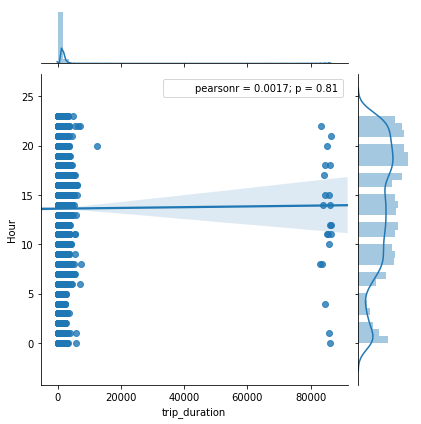

In [71]:
sns.jointplot(x='trip_duration', y='Hour', 
              data=df, kind='reg');

In [74]:
df2 = df.groupby('Hour')[['id']].count()
df2

,id
Hour,
0,760
1,521
2,382
3,312
4,230
5,204
6,460
7,703
8,908
